In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt 
from baum_welch import *
from sequence_creator_according_to_hmm_model import *

In [2]:
def get_initial_values(A_gt, B_gt, noice_variance):
    K = A_gt.shape[0]
    
    noise = np.random.normal(0, noice_variance, A_gt.shape)
    A_pert = np.abs(A_gt + noise)
    A_init = np.divide(A_pert, np.sum(A_pert, axis=1).reshape((-1, K)).T)
    A_init = np.round(A_init, 3)

    noise = np.random.normal(0, noice_variance, B_gt.shape)
    B_pert = np.abs(B_gt + noise)
    B_init = np.divide(B_pert, np.sum(B_pert, axis=1).reshape((-1, K)).T)
    B_init = np.round(B_init, 3)
    
    pi_init = (np.ones(K)/K).reshape((K,1))
    return A_init, B_init, pi_init

B init: [[0.129 0.13  0.062 0.266 0.085 0.122 0.17  0.035]
 [0.075 0.005 0.091 0.19  0.265 0.115 0.127 0.132]
 [0.136 0.112 0.077 0.015 0.017 0.119 0.203 0.322]
 [0.276 0.065 0.043 0.142 0.106 0.134 0.096 0.139]]
B final: [[0.032 0.147 0.173 0.272 0.056 0.121 0.192 0.008]
 [0.255 0.    0.014 0.227 0.117 0.075 0.08  0.232]
 [0.198 0.123 0.022 0.023 0.139 0.066 0.022 0.407]
 [0.22  0.1   0.051 0.224 0.    0.261 0.004 0.14 ]]
B_gt: [[0.204 0.167 0.047 0.139 0.122 0.129 0.084 0.109]
 [0.159 0.08  0.026 0.232 0.106 0.053 0.109 0.235]
 [0.079 0.123 0.188 0.191 0.07  0.058 0.14  0.152]
 [0.169 0.053 0.021 0.308 0.03  0.316 0.012 0.091]]


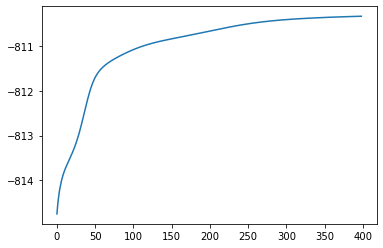

"\n# Second hold A and pi just update B\nA, B, pi, prob_list, iter, final_tolerance = fit(A_gt, B_init, teoretical_observations, K, TOL = 1e-5, NUM_ITER = 400, pi = pi_gt, hold_A=True, hold_pi=True)\nprint('B init:', B_init)\nprint('B final:', np.round(B,3))\nprint('B_gt:', B_gt)\nplt.show(plt.plot(prob_list[1:]))\n\n# Third update everything\nA, B, pi, prob_list, iter, final_tolerance = fit(A_init, B_init, teoretical_observations, K, TOL = 1e-5, NUM_ITER = 400, pi = pi_init)\nprint('A init:', A_init)\nprint('A final:', np.round(A,3))\nprint('A_gt:', A_gt)\nplt.show(plt.plot(prob_list[1:]))\n"

In [3]:
K = 4
L = 8
T = 10
N = 400
noise = 0.5

np.random.seed(33)
A_gt, B_gt, pi_gt, teoretical_observations, teoretical_states = hmmgenerate(K, L, T, N, S=0, D=0, edhmm = False)
A_init, B_init, pi_init = get_initial_values(A_gt, B_gt, noise)

# First hold B and pi just update A
A, B, pi, prob_list, iter, final_tolerance = fit(A_init, B_init, teoretical_observations, K, TOL = 1e-5, NUM_ITER = 400, pi = pi_init, hold_B=False, hold_pi=True)
print('B init:', B_init)
print('B final:', np.round(B,3))
print('B_gt:', B_gt)
plt.show(plt.plot(prob_list[1:]))